In [1]:
# Earth Engine API
!pip install earthengine-api
!pip install geemap

# Data Handling
!pip install pandas numpy matplotlib seaborn

# Deep Learning
!pip install tensorflow keras

# Mapping
!pip install folium


   ---------------------------------------- 0.0/13.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.7 MB ? eta -:--:--
    --------------------------------------- 0.3/13.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.7 MB 932.9 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/13.7 MB 1.0 MB/s eta 0:00:13
   --- ------------------------------------ 1.0/13.7 MB 1.2 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/13.7 MB 1.3 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/13.7 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/13.7 MB 1.4 MB/s eta 0:00:09
   ------ --------------------------------- 2.4/13.7 MB 1.4 MB/s eta 0:00:09
   -------- ------------------------------- 2.9/13.7 MB 1.5 MB/s eta 0:00:08
   --------- ------------------------------ 3.1/13.7 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 3.4/13.7 MB 1.5 MB/s eta 0:00:07
   ---------- ----

  DEPRECATION: Building 'pyperclip' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pyperclip'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [5]:
import ee

# Authenticate again
ee.Authenticate()

# Initialize Earth Engine
ee.Initialize()


In [7]:
# Example: Get Sentinel-5P NO2 data
sentinel5 = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2') \
    .filterDate('2024-01-01', '2024-12-31') \
    .filterBounds(ee.Geometry.Point(77.1025, 28.7041))  # Delhi

# Reduce to daily mean NO2
def get_daily_mean(image):
    return image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=ee.Geometry.Point(77.1025, 28.7041),
        scale=1000
    ).get('tropospheric_NO2_column_number_density').getInfo()

# Get time series
ee_list = sentinel5.toList(sentinel5.size())
dates = sentinel5.aggregate_array('system:time_start').getInfo()
no2_values = []

for i in range(sentinel5.size().getInfo()):
    img = ee.Image(ee_list.get(i))
    try:
        value = get_daily_mean(img)
    except:
        value = None  # If no data for that day
    no2_values.append(value)


In [8]:
import pandas as pd

# Example dataframe
data = pd.DataFrame({
    'date': pd.to_datetime(dates, unit='ms'),
    'NO2': no2_values,
    # Add CO, O3, Temperature, WindSpeed, Historical AQI
})

data = data.dropna()
data.set_index('date', inplace=True)


In [9]:
import pandas as pd
import numpy as np

# Create example dataframe
data = pd.DataFrame({
    'date': pd.to_datetime(dates, unit='ms'),
    'NO2': no2_values,
    'CO': np.random.uniform(0.2, 1.0, len(no2_values)),         # Random placeholder
    'O3': np.random.uniform(0.01, 0.05, len(no2_values)),       # Random placeholder
    'Temperature': np.random.uniform(15, 35, len(no2_values)),  # Random placeholder
    'WindSpeed': np.random.uniform(1, 10, len(no2_values)),     # Random placeholder
    'AQI': np.random.randint(50, 200, len(no2_values))          # Random placeholder AQI
})

# Drop rows with any NaN values
data = data.dropna()

# Set date as index
data.set_index('date', inplace=True)

# Save to CSV
save_path = r"C:\Users\sagni\Downloads\Pollution controller\data.csv"
data.to_csv(save_path)

print(f"✅ Data saved successfully at {save_path}")


✅ Data saved successfully at C:\Users\sagni\Downloads\Pollution controller\data.csv


In [11]:
import pandas as pd

# Load without parse_dates or index_col
data = pd.read_csv(r"C:\Users\sagni\Downloads\Pollution controller\final_data.csv")
print(data.columns)
print(data.head())


Index(['Unnamed: 0', 'NO2_x', 'CO_x', 'O3_x', 'Temperature', 'WindSpeed',
       'AQI_x', 'PM2.5', 'PM10', 'NO2_y', 'CO_y', 'O3_y', 'AQI_y'],
      dtype='object')
Empty DataFrame
Columns: [Unnamed: 0, NO2_x, CO_x, O3_x, Temperature, WindSpeed, AQI_x, PM2.5, PM10, NO2_y, CO_y, O3_y, AQI_y]
Index: []


In [17]:
pip install rasterio geopandas matplotlib


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---- ----------------------------------- 2.1/19.2 MB 9.8 MB/s eta 0:00:02
   --------- ------------------------------ 4.5/19.2 MB 10.8 MB/s eta 0:00:02
   -------------- ------------------------- 6.8/19.2 MB 11.0 MB/s eta 0:00:02
   ----------------- ---------------------- 8.4/19.2 MB 11.1 MB/s eta 0:00:01
   -------------------- ------------------- 10.0/19.2 MB 9.6 MB/s eta 0:00:01
   ------------------------- -------------- 12.3/19.2 MB 9.9 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.2 MB 10.1 MB/s eta 0:00:01
   ----------------------------------- ---- 17.0/19.2 MB 10.3 MB/s eta 0:00:01
   ------------------------------------- -- 18.1/19.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   --------------- ------------------------ 2.4/6.3 MB 11.2 MB/s eta 0:00:01
   

CRS: EPSG:4326
Bounds: BoundingBox(left=76.83290625074268, bottom=28.395746131018075, right=77.34494596269082, top=28.907785842966202)
Resolution: (0.008983152841195215, 0.008983152841195215)
Width: 57 Height: 57


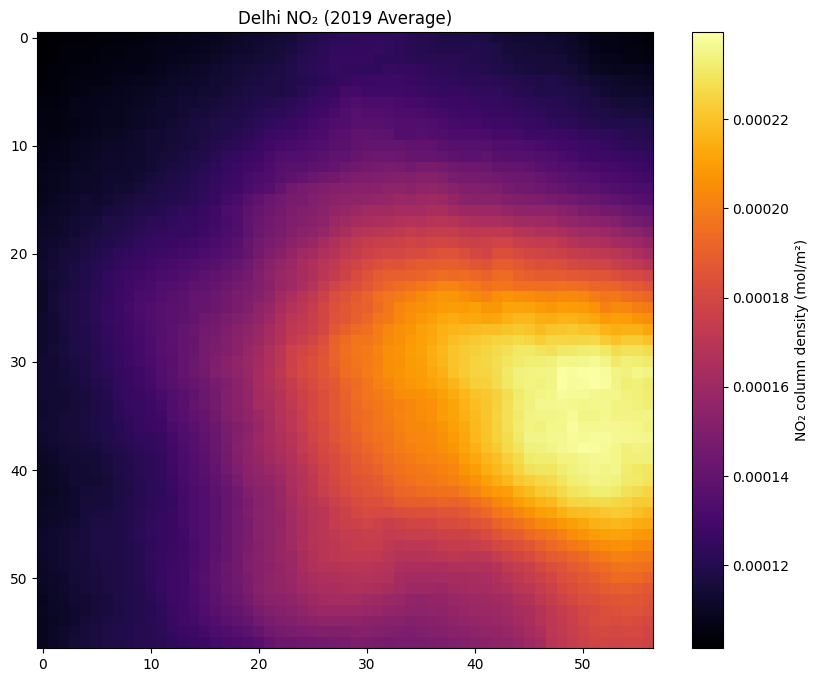

In [19]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path to GeoTIFF
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\delhi_no2_2019.tif"

# Open GeoTIFF
with rasterio.open(tif_path) as src:
    no2_data = src.read(1)  # Read first band
    profile = src.profile   # Metadata (CRS, dtype, width, height, etc.)

    # Print metadata
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Resolution:", src.res)
    print("Width:", src.width, "Height:", src.height)

# Plot the NO₂ data
plt.figure(figsize=(10, 8))
plt.imshow(no2_data, cmap='inferno')
plt.colorbar(label='NO₂ column density (mol/m²)')
plt.title('Delhi NO₂ (2019 Average)')
plt.show()


In [21]:
import pandas as pd

# List of stations with coordinates
stations = [
    {"Station": "Anand Vihar", "Latitude": 28.6506, "Longitude": 77.3150},
    {"Station": "RK Puram", "Latitude": 28.5669, "Longitude": 77.2000},
    {"Station": "Punjabi Bagh", "Latitude": 28.6692, "Longitude": 77.1265},
    {"Station": "Mandir Marg", "Latitude": 28.6321, "Longitude": 77.2089},
    {"Station": "Civil Lines", "Latitude": 28.6863, "Longitude": 77.2270},
    {"Station": "Shadipur", "Latitude": 28.6511, "Longitude": 77.1577},
    {"Station": "Ashok Vihar", "Latitude": 28.6910, "Longitude": 77.1810},
    {"Station": "Dwarka", "Latitude": 28.5867, "Longitude": 77.0431},
    {"Station": "ITO", "Latitude": 28.6289, "Longitude": 77.2425}
]

# Convert to DataFrame
stations_df = pd.DataFrame(stations)

# Save to CSV
stations_csv_path = r"C:\Users\sagni\Downloads\Pollution controller\delhi_stations.csv"
stations_df.to_csv(stations_csv_path, index=False)
print(f"Station CSV saved to: {stations_csv_path}")


Station CSV saved to: C:\Users\sagni\Downloads\Pollution controller\delhi_stations.csv


In [22]:
import rasterio
import pandas as pd

# Paths
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\delhi_no2_2019.tif"
stations_csv = r"C:\Users\sagni\Downloads\Pollution controller\delhi_stations.csv"
output_csv = r"C:\Users\sagni\Downloads\Pollution controller\delhi_stations_no2.csv"

# Load station coordinates
stations_df = pd.read_csv(stations_csv)

# Open the GeoTIFF
with rasterio.open(tif_path) as src:
    # Get metadata for info
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Resolution:", src.res)

    # Loop through each station
    no2_values = []
    for idx, row in stations_df.iterrows():
        station_name = row['Station']
        lon = row['Longitude']
        lat = row['Latitude']

        try:
            # Convert lat/lon to raster row, col
            row_idx, col_idx = src.index(lon, lat)
            # Read NO2 value
            no2_value = src.read(1)[row_idx, col_idx]
            print(f"{station_name}: NO2 = {no2_value}")
        except IndexError:
            # If point is outside the raster bounds
            no2_value = None
            print(f"{station_name}: Outside raster bounds")

        no2_values.append(no2_value)

# Add NO2 values to DataFrame
stations_df['NO2'] = no2_values

# Save updated DataFrame to CSV
stations_df.to_csv(output_csv, index=False)
print(f"Saved NO2 values to {output_csv}")


CRS: EPSG:4326
Bounds: BoundingBox(left=76.83290625074268, bottom=28.395746131018075, right=77.34494596269082, top=28.907785842966202)
Resolution: (0.008983152841195215, 0.008983152841195215)
Anand Vihar: NO2 = 0.00021991880814695318
RK Puram: NO2 = 0.0002172428692153819
Punjabi Bagh: NO2 = 0.00019922627744029602
Mandir Marg: NO2 = 0.0002259481911058548
Civil Lines: NO2 = 0.00020702936227244955
Shadipur: NO2 = 0.00021299773663947471
Ashok Vihar: NO2 = 0.000207214203689736
Dwarka: NO2 = 0.00017132673925552652
ITO: NO2 = 0.00023418897371293664
Saved NO2 values to C:\Users\sagni\Downloads\Pollution controller\delhi_stations_no2.csv
